<a href="https://colab.research.google.com/github/robsonmidao/MVP-PUCRJ-Modulo-4/blob/main/MVP_PUCRJ_RobsonBarreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes
## MVP

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/robsonmidao/MVP-PUCRJ-Modulo-4-dataset/main/Dataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [3]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.632971 (0.081972)
CART: 0.721739 (0.048914)
NB: 0.827536 (0.085648)
SVM: 0.662319 (0.091528)


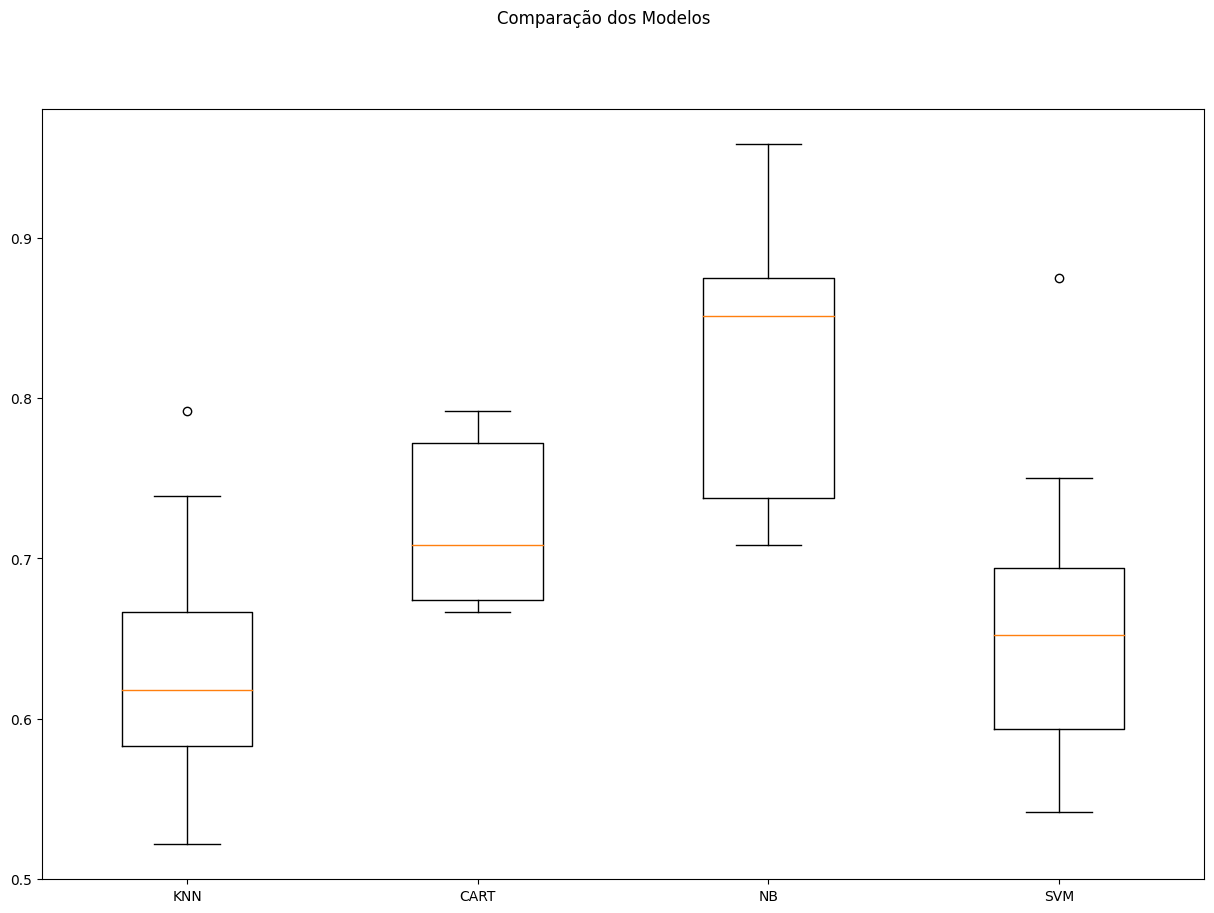

In [4]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.633 (0.082)
CART-orig: 0.722 (0.049)
NB-orig: 0.828 (0.086)
SVM-orig: 0.662 (0.092)
KNN-padr: 0.844 (0.068)
CART-padr: 0.709 (0.071)
NB-padr: 0.828 (0.086)
SVM-padr: 0.840 (0.071)
KNN-norm: 0.810 (0.082)
CART-norm: 0.714 (0.081)
NB-norm: 0.828 (0.086)
SVM-norm: 0.815 (0.078)


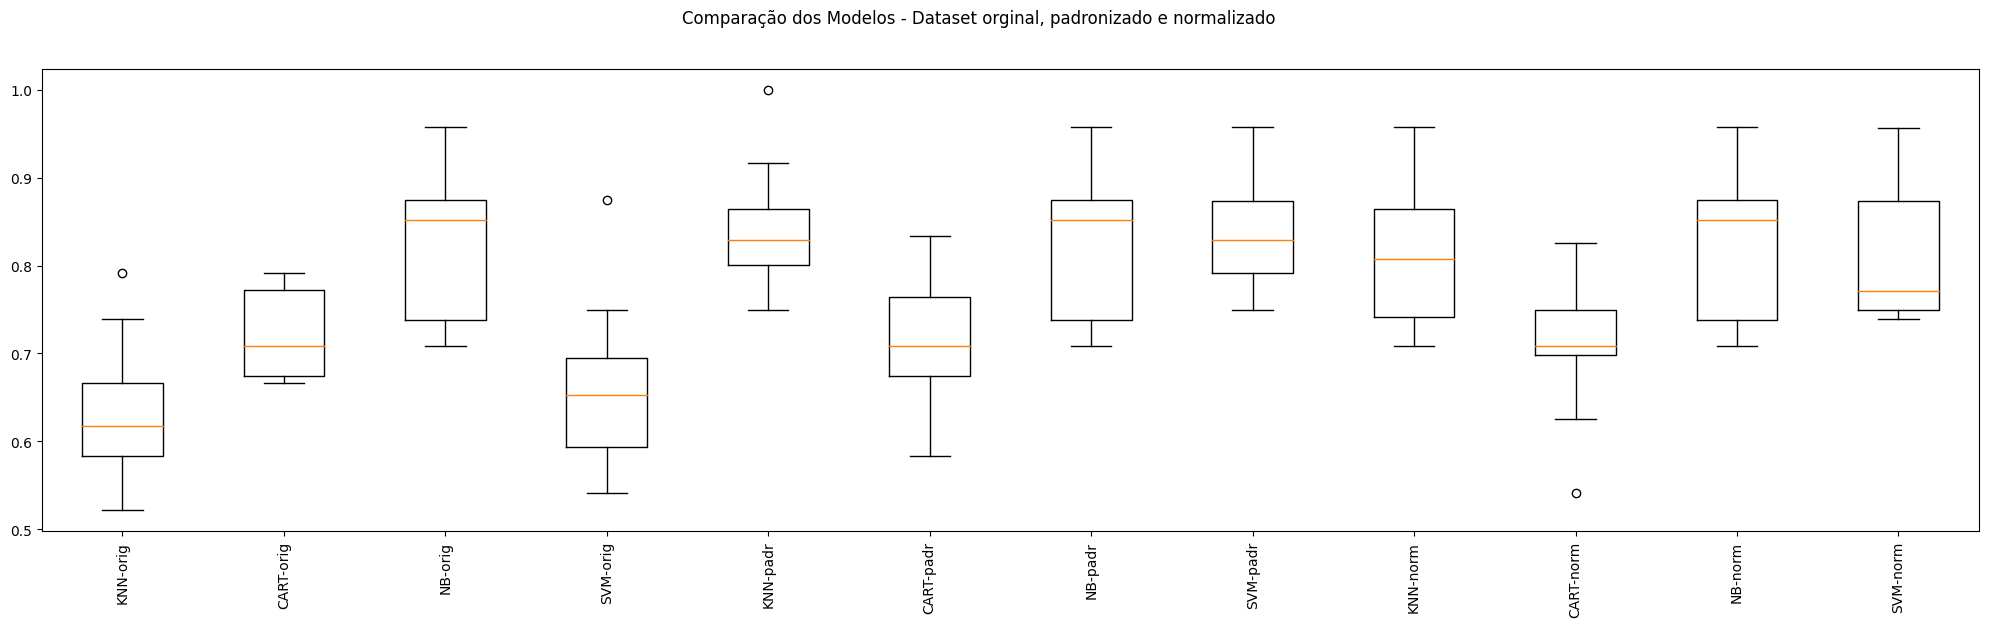

In [5]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [6]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.700543 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-padr - Melhor: 0.860870 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Sem tratamento de missings: knn-norm - Melhor: 0.832065 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}


## Finalização do Modelo

In [7]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=21)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8166666666666667


Preparação do modelo com TODO


In [8]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

## Simulando a aplicação do modelo em dados não vistos

In [9]:
# Novos dados - não sabemos a classe!
data = {'age':[50, 70, 66],
        'sex':[1, 0, 1],
        'cp':[0, 2, 3],
        'trestbps':[152, 121, 120],
        'chol':[258, 149, 300],
        'fbs':[1, 0, 0],
        'restecg':[0, 0, 2],
        'thalach':[128, 130, 162],
        'exang':[0, 1, 0],
        'oldpeak':[1.2, 2.1, 0.9],
        'slope':[1, 1, 1],
        'ca':[0, 0, 0],
        'thal':[2, 1, 0]
        }



atributos = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.50274988  0.69109474 -2.24062879  1.14512703  0.20515965  2.43042728
  -1.00341866 -0.9430823  -0.69641941  0.12407633  0.6437811  -0.72197605
   1.21977769]
 [ 1.7109894  -1.44697961 -0.16428947 -0.60303821 -1.89462963 -0.41145029
  -1.00341866 -0.85575715  1.43591632  0.89716729  0.6437811  -0.72197605
   0.17274308]
 [ 1.26824154  0.69109474  0.87388018 -0.65943064  1.01425277 -0.41145029
   1.01019851  0.54144538 -0.69641941 -0.13362066  0.6437811  -0.72197605
  -0.87429153]]


In [10]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 0.]


Fazendo o download do arquivo pkl

In [11]:
from google.colab import files
import pickle

# Salvar o modelo em um arquivo usando pickle
arquivo_modelo = 'classificador.pkl'
with open(arquivo_modelo, 'wb') as f:
    pickle.dump(model, f)

# Baixar o arquivo para o seu computador local
files.download(arquivo_modelo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fazendo o download do arquivo joblib

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Seus dados de treinamento
data = {'age': [50, 70, 66],
        'sex': [1, 0, 1],
        'cp': [0, 2, 3],
        'trestbps': [152, 121, 120],
        'chol': [258, 149, 300],
        'fbs': [1, 0, 0],
        'restecg': [0, 0, 2],
        'thalach': [128, 130, 162],
        'exang': [0, 1, 0],
        'oldpeak': [1.2, 2.1, 0.9],
        'slope': [1, 1, 1],
        'ca': [0, 0, 0],
        'thal': [2, 1, 0]
        }

atributos = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
entrada = pd.DataFrame(data, columns=atributos)

# Extrair as features
X_train_new = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(X_train_new)

# Salvar o scaler em um arquivo
dump(scaler, 'scaler.joblib')

# Fazer o download do arquivo
files.download('scaler.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Regressão Linear

In [13]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load

Criação e treino do modelo.


In [14]:
# Cria o modelo
modelo = LogisticRegression(solver='liblinear')

# Treina o modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [15]:
# Salva o modelo no disco
filename = 'HeartDisease_lr.pkl'
dump(modelo, open(filename, 'wb'))

Carrega o modelo

In [16]:
# Algum tempo depois...
# Carrega o modelo do disco
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.85


In [17]:
# Baixar o arquivo para o ambiente local
files.download('HeartDisease_lr.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Principais achados:

  * Na criação e avaliação de modelos
    * Linha base, o algoritmo naive_bayes apresentou maior precisão de acertos que os demais.
    * Dados padronizados e normalizados:
      * Dataset Original - NB-orig apresentou maior precisão
      * Dataset Padronizado - KNN-padr apresentou maior precisão
      * Dataset Normalizado - NB-norm apresentou maior precisão

  * Na otimização dos hiperparâmetros
    * knn-padr obteve melhor precisão com a métrica manhattan e KNN__n_neighbors 5

  *Na finalização do modelo, foi apresentada a precisão de 0.81

  *Na simulação da aplicação do modelo em dados não vistos, obteve-se as duas predições possíveis nos dados de entrada


Análise dos resultados:

Em geral apresentou uma boa precisão nas predições que foram realizadas no modelo.

Pontos de atenção:

A base de dados original é proveniente de um hospital em uma cidade específica, levando em conta somente os pacientes daquela região.

Conclusão do problema:

O modelo apresentou suas predições conforme o esperado. Através dos dados de entrada o sistema realiza a predição e informa se o paciente é um forte candidato a ter doença cardíaca.